In [1]:
import numpy as np
from matplotlib import colormaps


import matplotlib.image as mpimg
from matplotlib.colors import rgb_to_hsv
import matplotlib.pyplot as plt

plt.rc('figure', dpi=250)

In [2]:
def find_unique_colors(image):
    im = image.copy()
    shape = image.shape
    image = im.reshape((shape[0]*shape[1], 3))
    unique_colors = np.unique(image, axis=0)
    return unique_colors

def hsv_to_cartesian(hsv):
    return np.array([
        hsv[1] * np.cos(2*np.pi*hsv[0]),
        hsv[1] * np.sin(2*np.pi*hsv[0]),
        hsv[2],
    ])

def distance(a, b) -> float:
    # return np.linalg.norm(a-b)
    a_c, b_c = hsv_to_cartesian(a), hsv_to_cartesian(b)
    return np.sqrt((a_c[0]-b_c[0])**2 + (a_c[1]-b_c[1])**2 + (a_c[2]-b_c[2])**2)

class Colormap():
    def __init__(self, nickname, n_levels=128):
        self.counter = 0
        self.cmap = colormaps.get(nickname)
        self.values = np.linspace(0.0, 1.0, n_levels, endpoint=True)
        self.colors = rgb_to_hsv(self.cmap(self.values)[:,:3])


    def best_value(self, color):
        self.counter += 1
        # progress = self.counter/9520.0
        # if progress % 0.01 == 0:
        # return 0.5
        distance_func = lambda x: distance(x, color)
        distances = np.apply_along_axis(distance_func, axis=1, arr=self.colors)
        # print(distances)
        # print(self.colors[-1])
        best_index = np.argmin(distances)
        # print(f'best value {color}, d = {distances[best_index]}')
        return self.values[best_index]

    # def find_values_for_colors(self, colors):
    #     distances = np.ndarray(colors.shape[0])
    #     for i, color in enumerate(colors):
    #         distances[i] = self.distance(self.colors, color)

In [13]:
def load_hsv_image(filename):
    image = mpimg.imread(filename).copy()
    image = rgb_to_hsv(image[:,:,:3])
    image[:,:,2] = 1.0 - image[:,:,2]/255
    return image

def create_value_image(cmap, image):
    im = image.copy()
    shape = image.shape
    image = im.reshape((shape[0]*shape[1], 3))
    image_v = np.apply_along_axis(cmap.best_value, axis=1, arr=image)
    image_v = image_v.reshape((shape[0], shape[1], 1))
    return image_v

In [15]:
filename = "nsbh.png"
cmap = Colormap("jet", n_levels=128) 


image = load_hsv_image(filename)

size = image.shape[0]*image.shape[1]
print(size)


image_v = create_value_image(cmap, image)

60347


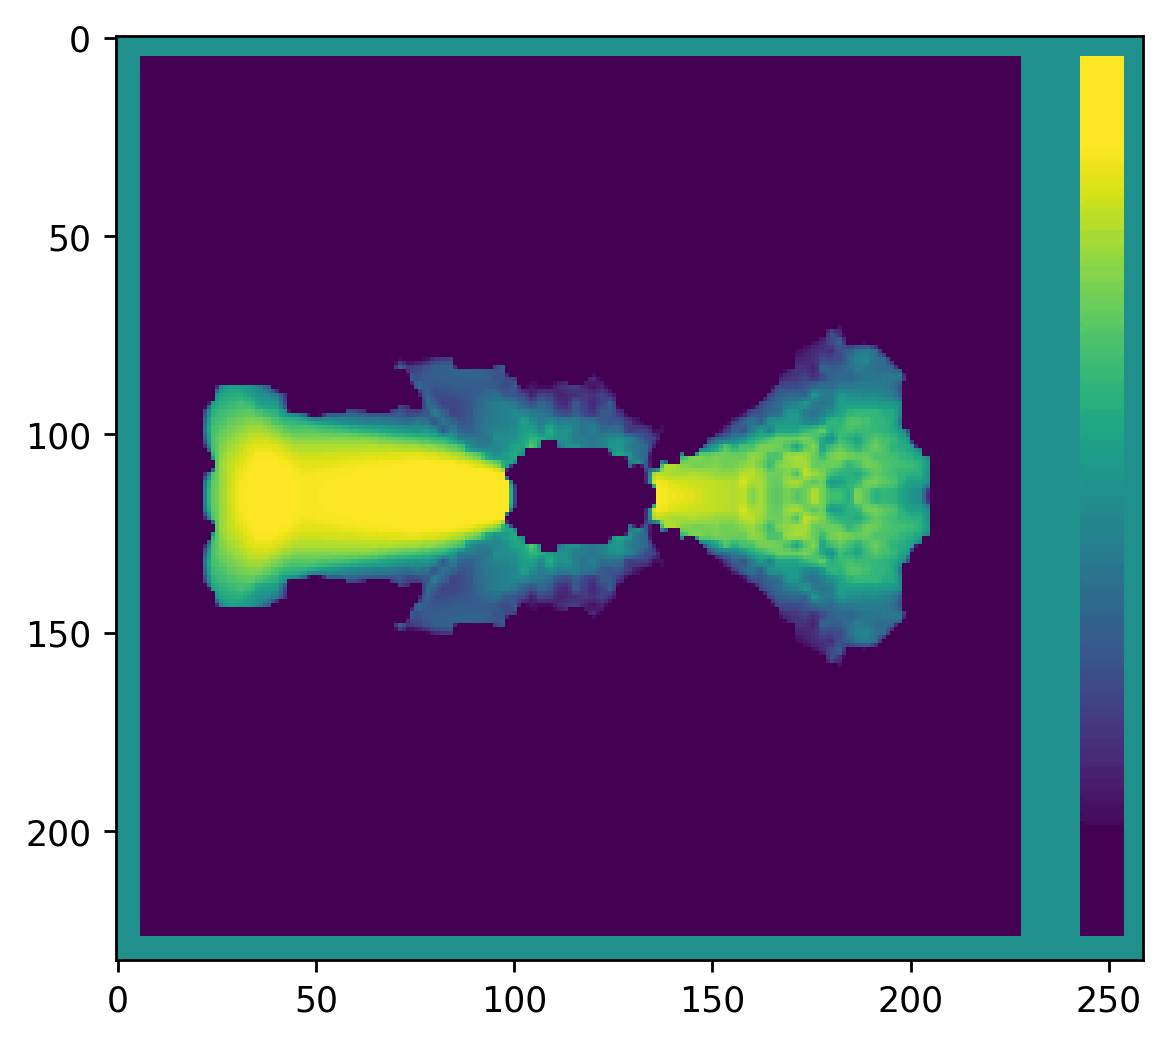

In [17]:
# print(image_v)

plt.imshow(image_v, cmap='viridis') #, vmin=0.0, vmax=1.0)
plt.savefig('nsbh_viridis_recovered.png', bbox_inches='tight')